In [133]:
import pandas as pd
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_columns', None)   
pd.set_option('display.width', None)         
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_columns', None)   
pd.set_option('display.width', None)    
pd.set_option('display.float_format', '{:.2f}'.format)

artifacts = pd.read_csv("/Users/kaziamithasan/Desktop/Research/msr25/msr_fulldata/artifacts.csv")
artifact_release = pd.read_csv("/Users/kaziamithasan/Desktop/Research/msr25/msr_fulldata/artifact_release.csv")
release = pd.read_csv("/Users/kaziamithasan/Desktop/Research/msr25/msr_fulldata/releases.csv")
# added_values = pd.read_csv("/Users/kaziamithasan/Desktop/Research/msr25/msr_fulldata/added_values.csv")
# dependency = pd.read_csv("/Users/kaziamithasan/Desktop/Research/msr25/msr_fulldata/dependencies.csv")

In [134]:
artifact_release['artifact_id'].nunique()

635003

In [135]:
release['release_timestamp'] = pd.to_datetime(release['release_timestamp'], unit='ms')


In [136]:
# Merge artifacts with their releases
artifact_releases = pd.merge(artifact_release, release, on='release_id', how='inner')
artifact_releases = pd.merge(artifact_releases, artifacts[['artifact_id']], on='artifact_id', how='inner')


In [137]:
# Define the date range
start_date = '2014-09-04'
end_date = '2024-09-04'

# Filter the release history to include only records within 2014-2024
filtered_release_history = artifact_releases[
    (artifact_releases['release_timestamp'] >= start_date) &
    (artifact_releases['release_timestamp'] <= end_date)
]
filtered_release_history = filtered_release_history.sort_values(by=['artifact_id', 'release_timestamp'])
filtered_release_history

,artifact_id,release_id,release_version,release_timestamp
13237446,abbot:abbot,abbot:abbot:1.4.0,1.4.0,2015-09-22 15:54:01
10918348,abbot:costello,abbot:costello:1.4.0,1.4.0,2015-09-24 09:21:46
12701068,academy.alex:custommatcher,academy.alex:custommatcher:1.0,1.0,2018-05-31 18:57:25
9227569,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38
9227570,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22
...,...,...,...,...
10399545,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18
10399546,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05
13413156,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11
13413154,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50


In [138]:
filtered_release_history['artifact_id'].nunique()

581424

In [139]:

# Group by artifact_id and get the first and last release date per project
release_date_range = filtered_release_history.groupby('artifact_id')['release_timestamp'].agg(['min', 'max'])
# Group by artifact_id and get the first and last release date per project
release_date_range = filtered_release_history.groupby('artifact_id')['release_timestamp'].agg(['min', 'max'])

# Filter to include only projects with both first and last release dates within 2014-2024
valid_projects = release_date_range[
    (release_date_range['min'] >= start_date) &
    (release_date_range['max'] <= end_date)
].index

# Filter the original dataframe to include only valid projects
filtered_release_history = filtered_release_history[filtered_release_history['artifact_id'].isin(valid_projects)]
filtered_release_history

,artifact_id,release_id,release_version,release_timestamp
13237446,abbot:abbot,abbot:abbot:1.4.0,1.4.0,2015-09-22 15:54:01
10918348,abbot:costello,abbot:costello:1.4.0,1.4.0,2015-09-24 09:21:46
12701068,academy.alex:custommatcher,academy.alex:custommatcher:1.0,1.0,2018-05-31 18:57:25
9227569,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38
9227570,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22
...,...,...,...,...
10399545,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18
10399546,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05
13413156,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11
13413154,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50


In [140]:
filtered_release_history['artifact_id'].nunique()

581424

In [141]:
new_project_cutoff = pd.to_datetime('2023-08-30')


# Group by artifact_id to get the first and last release dates and count of releases per project
release_date_range = filtered_release_history.groupby('artifact_id')['release_timestamp'].agg(['min', 'max', 'count'])


In [142]:
release_date_range

,min,max,count
artifact_id,,,
abbot:abbot,2015-09-22 15:54:01,2015-09-22 15:54:01,1
abbot:costello,2015-09-24 09:21:46,2015-09-24 09:21:46,1
academy.alex:custommatcher,2018-05-31 18:57:25,2018-05-31 18:57:25,1
academy.compose.companion:multi-fab,2021-01-05 21:01:38,2021-01-14 06:40:25,3
ae.teletronics.ejabberd:EjabberdXMLRPCClient,2016-10-27 04:48:11,2017-03-14 08:38:12,4
...,...,...,...
zone.src.sheaf:sheaf-parent,2015-01-23 10:37:20,2023-08-21 09:29:38,20
zone.src.sheaf:web-sheaf,2015-01-23 14:53:59,2023-08-21 12:15:54,23
zone.stefan.dev:geocode,2021-01-08 15:30:37,2021-01-08 17:44:45,2


In [143]:
# Apply filters:
# 1. Include projects with more than 1 release
# 2. Include projects with the first release date before August 30, 2023
valid_projects = release_date_range[
    (release_date_range['count'] > 1) &  # More than 1 release
    (release_date_range['min'] < new_project_cutoff)  # First release before August 30, 2023
].index

valid_projects

Index(['academy.compose.companion:multi-fab',
       'ae.teletronics.ejabberd:EjabberdXMLRPCClient',
       'ae.teletronics.nlp:categorisation',
       'ae.teletronics.nlp:entityextraction',
       'ae.teletronics.nlp:language-detector', 'ae.teletronics.peers:peers',
       'ae.teletronics.peers:peers-demo', 'ae.teletronics.peers:peers-doc',
       'ae.teletronics.peers:peers-gui', 'ae.teletronics.peers:peers-lib',
       ...
       'zone.refactor.spring:hateoas', 'zone.refactor.spring:validation',
       'zone.src.sheaf:java-sheaf', 'zone.src.sheaf:logback-sheaf',
       'zone.src.sheaf:sheaf-deps-bom', 'zone.src.sheaf:sheaf-parent',
       'zone.src.sheaf:web-sheaf', 'zone.stefan.dev:geocode',
       'zone.wmj:user-agent-util', 'zw.co.paynow:java-sdk'],
      dtype='object', name='artifact_id', length=403048)

In [144]:
filtered_release_history = filtered_release_history[filtered_release_history['artifact_id'].isin(valid_projects)]
filtered_release_history

,artifact_id,release_id,release_version,release_timestamp
9227569,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38
9227570,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22
9227571,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2.3,1.2.3,2021-01-14 06:40:25
7622385,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.2,1.0.2,2016-10-27 04:48:11
7622383,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.4,1.0.4,2017-03-12 08:29:30
...,...,...,...,...
10399545,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18
10399546,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05
13413156,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11
13413154,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50


In [145]:
filtered_release_history['artifact_id'].nunique()

403048

In [146]:
# Sort by artifact_id and release_timestamp
filtered_release_history = filtered_release_history.sort_values(by=['artifact_id', 'release_timestamp'])

# Calculate intervals between releases for each artifact
filtered_release_history['interval'] = filtered_release_history.groupby('artifact_id')['release_timestamp'].diff().dt.total_seconds() / (24 * 3600)  # Convert to days
filtered_release_history

,artifact_id,release_id,release_version,release_timestamp,interval
9227569,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38,NaN
9227570,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22,1.99
9227571,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2.3,1.2.3,2021-01-14 06:40:25,6.41
7622385,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.2,1.0.2,2016-10-27 04:48:11,NaN
7622383,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.4,1.0.4,2017-03-12 08:29:30,136.15
...,...,...,...,...,...
10399545,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18,43.27
10399546,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05,53.64
13413156,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11,NaN
13413154,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50,59.78


In [147]:
filtered_release_history.describe()

,release_timestamp,interval
count,13124329,12721281.00
mean,2021-03-04 10:43:30.058676480,25.66
min,2014-09-04 00:03:06,0.00
25%,2019-07-15 21:47:09,0.94
50%,2021-09-12 11:58:11,4.40
75%,2023-02-26 05:52:33,20.84
max,2024-08-29 23:13:51,3559.76
std,NaN,80.05


In [148]:
#filtered_release_history.to_csv('full_release_history.csv', index=False)

In [149]:
# filtered_release_history['release_year'] = filtered_release_history['release_timestamp'].dt.year

# # Find the first release year for each project (artifact_id)
# first_release_year = (
#     filtered_release_history.groupby('artifact_id')['release_year']
#     .min()
#     .reset_index()
#     .rename(columns={'release_year': 'creation_year'})
# )

# # Merge this back into filtered_release_history to mark each project with its creation year
# filtered_release_history = filtered_release_history.merge(first_release_year, on='artifact_id', how='left')

# # Initialize cumulative set to keep track of unique projects each year
# cumulative_unique_projects = set()

# # Initialize list to store yearly project data
# years = sorted(filtered_release_history['release_year'].unique())
# yearly_data = []

# for year in years:
#     # New projects: projects that were created in the current year
#     new_projects = set(first_release_year[first_release_year['creation_year'] == year]['artifact_id'])
    
#     # Continuing projects: projects that were created before the current year and are active in this year
#     continuing_projects = set(filtered_release_history[
#         (filtered_release_history['creation_year'] < year) &
#         (filtered_release_history['release_year'] == year)
#     ]['artifact_id'])
    
#     # Total projects for the year (new + continuing)
#     total_projects = len(new_projects) + len(continuing_projects)
    
#     # Update cumulative set with both new and continuing projects for each year
#     cumulative_unique_projects.update(new_projects)
#     cumulative_unique_projects.update(continuing_projects)
    
#     # Cumulative count of unique projects up to this year
#     cumulative_unique_count = len(cumulative_unique_projects)

#     # Append data for each year
#     yearly_data.append({
#         'year': year,
#         'continuing_projects': len(continuing_projects),
#         'new_projects': len(new_projects),
#         'total_projects': total_projects,  # Total projects for the current year only
#         'cumulative_unique_projects': cumulative_unique_count  # Cumulative unique projects up to this year
#     })

# # Convert to DataFrame to display
# yearly_projects_df = pd.DataFrame(yearly_data)
# yearly_projects_df


In [150]:
filtered_release_history

,artifact_id,release_id,release_version,release_timestamp,interval
9227569,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38,NaN
9227570,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22,1.99
9227571,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2.3,1.2.3,2021-01-14 06:40:25,6.41
7622385,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.2,1.0.2,2016-10-27 04:48:11,NaN
7622383,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.4,1.0.4,2017-03-12 08:29:30,136.15
...,...,...,...,...,...
10399545,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18,43.27
10399546,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05,53.64
13413156,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11,NaN
13413154,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50,59.78


In [151]:
# import pandas as pd

# # Define the abandonment cutoff date
# abandonment_cutoff = pd.to_datetime('2022-09-04')

# # Identify the last release date per project
# last_release_per_project = filtered_release_history.groupby('artifact_id')['release_timestamp'].max()

# # Identify abandoned projects (last release on or before the abandonment cutoff date)
# abandoned_projects = last_release_per_project[last_release_per_project <= abandonment_cutoff].index

# # Filter for abandoned projects in the original dataframe to get their release history
# abandoned_release_history = filtered_release_history[filtered_release_history['artifact_id'].isin(abandoned_projects)]

# # Get the last release year for each abandoned project
# abandoned_projects_last_year = (
#     abandoned_release_history.groupby('artifact_id')['release_timestamp']
#     .max()
#     .dt.year
#     .reset_index()
#     .rename(columns={'release_timestamp': 'abandonment_year'})
# )

# # Initialize cumulative set for abandoned projects to track unique counts over time
# cumulative_abandoned_projects = set()

# # List of years to iterate over for counting abandoned projects
# years = sorted(filtered_release_history['release_year'].unique())
# abandoned_yearly_data = []

# # Calculate yearly abandonment counts
# for year in years:
#     # Get projects abandoned in the current year
#     abandoned_in_year = set(abandoned_projects_last_year[abandoned_projects_last_year['abandonment_year'] == year]['artifact_id'])
    
#     # Add abandoned projects to cumulative set to maintain unique counts
#     cumulative_abandoned_projects.update(abandoned_in_year)
    
#     # Count for each year and cumulative abandoned count
#     total_unique_abandoned = len(abandoned_in_year)
#     cumsum_total_unique_abandoned = len(cumulative_abandoned_projects)
    
#     # Append yearly abandoned data
#     abandoned_yearly_data.append({
#         'year': year,
#         'total_unique_abandoned': total_unique_abandoned,
#         'cumsum_total_unique_abandoned': cumsum_total_unique_abandoned
#     })

# # Convert abandoned yearly data to DataFrame
# abandoned_yearly_df = pd.DataFrame(abandoned_yearly_data)

# # Merge abandoned project data with the original yearly projects DataFrame
# yearly_projects_df = yearly_projects_df.merge(abandoned_yearly_df, on='year', how='left')

# # Display the updated DataFrame with abandonment data
# yearly_projects_df.fillna(0, inplace=True)  # Replace any NaNs with 0s for years without abandonment
# yearly_projects_df


In [152]:
# # Calculate the yearly abandonment rate
# yearly_projects_df['abandonment_rate'] = yearly_projects_df['total_unique_abandoned'] / yearly_projects_df['total_projects']

# # Calculate the cumulative abandonment rate
# yearly_projects_df['cumulative_abandonment_rate'] = yearly_projects_df['cumsum_total_unique_abandoned'] / yearly_projects_df['cumulative_unique_projects']

# # Replace any potential NaN or infinite values with 0 for cleaner output
# yearly_projects_df.fillna(0, inplace=True)

# # Display the updated DataFrame
# yearly_projects_df


In [153]:
# import matplotlib.pyplot as plt

# # Plot cumulative curves for total projects and abandoned projects
# plt.figure(figsize=(10, 6))

# # Plot cumulative unique projects each year
# plt.plot(yearly_projects_df['year'], yearly_projects_df['cumulative_unique_projects'], label='Total Projects (Cumulative)', marker='o')

# # Plot cumulative abandoned projects each year
# plt.plot(yearly_projects_df['year'], yearly_projects_df['cumsum_total_unique_abandoned'], label='Abandoned Projects (Cumulative)', marker='o')

# # Add labels and title
# plt.xlabel('Year')
# plt.ylabel('Cumulative Count')
# plt.title('Cumulative Total Projects vs. Abandoned Projects per Year')
# plt.legend()
# plt.grid(True)
# plt.show()


In [154]:
abandonment_cutoff = pd.to_datetime('2022-09-04')

# Identify the last release date per project
last_release_per_project = filtered_release_history.groupby('artifact_id')['release_timestamp'].max()

In [155]:
# Classify projects as abandoned or active
abandoned_projects = last_release_per_project[last_release_per_project <= abandonment_cutoff].index
active_projects = last_release_per_project[last_release_per_project > abandonment_cutoff].index


In [156]:
# Filter the original dataframe to create abandoned and active project datasets
abandoned_release_history = filtered_release_history[filtered_release_history['artifact_id'].isin(abandoned_projects)]
active_release_history = filtered_release_history[filtered_release_history['artifact_id'].isin(active_projects)]


In [157]:
abandoned_release_history

,artifact_id,release_id,release_version,release_timestamp,interval
9227569,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38,NaN
9227570,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22,1.99
9227571,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2.3,1.2.3,2021-01-14 06:40:25,6.41
7622385,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.2,1.0.2,2016-10-27 04:48:11,NaN
7622383,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.4,1.0.4,2017-03-12 08:29:30,136.15
...,...,...,...,...,...
10399545,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18,43.27
10399546,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05,53.64
13413156,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11,NaN
13413154,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50,59.78


In [158]:
abandoned_release_history['artifact_id'].nunique()

206768

In [159]:
active_release_history['artifact_id'].nunique()

196280

In [160]:
# Add the 'is_abandoned' column to each dataset
abandoned_release_history['is_abandoned'] = 1  # Mark as abandoned
active_release_history['is_abandoned'] = 0  # Mark as active


/var/folders/49/199vrwcn1zqb7rx4rgy0xhbr0000gn/T/ipykernel_86109/637280563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abandoned_release_history['is_abandoned'] = 1  # Mark as abandoned
/var/folders/49/199vrwcn1zqb7rx4rgy0xhbr0000gn/T/ipykernel_86109/637280563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_release_history['is_abandoned'] = 0  # Mark as active


In [161]:
# Merge the two datasets into a single dataframe
merged_release_history = pd.concat([abandoned_release_history, active_release_history])

# Reset index to keep it clean
merged_release_history.reset_index(drop=True, inplace=True)
merged_release_history

,artifact_id,release_id,release_version,release_timestamp,interval,is_abandoned
0,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38,NaN,1
1,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22,1.99,1
2,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2.3,1.2.3,2021-01-14 06:40:25,6.41,1
3,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.2,1.0.2,2016-10-27 04:48:11,NaN,1
4,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.4,1.0.4,2017-03-12 08:29:30,136.15,1
...,...,...,...,...,...,...
13124324,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.2,1.0.2,2017-12-13 16:03:48,205.37,0
13124325,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.3,1.0.3,2020-10-29 22:57:17,1051.29,0
13124326,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.4,1.0.4,2022-08-25 17:07:58,664.76,0
13124327,zone.src.sheaf:web-sheaf,zone.src.sheaf:web-sheaf:1.0.5,1.0.5,2022-09-17 11:27:22,22.76,0


In [162]:
merged_release_history['is_abandoned'].value_counts()   

is_abandoned
0    10229187
1     2895142
Name: count, dtype: int64

In [163]:
print(merged_release_history.groupby('is_abandoned')['artifact_id'].nunique())

is_abandoned
0    196280
1    206768
Name: artifact_id, dtype: int64


In [164]:
def label_releases(df):
    # Sort by artifact_id and release_timestamp to ensure chronological order for each project
    df = df.sort_values(by=['artifact_id', 'release_timestamp'])
    
    # Initialize the labels and time_gap lists
    labels = []
    time_gaps = []

    # Iterate over each project (grouped by artifact_id)
    for _, group in df.groupby('artifact_id'):
        # Track the previous release date
        prev_release_date = None
        for index, row in group.iterrows():
            # If it's the first release, label as Start and set time_gap as NaT
            if prev_release_date is None:
                labels.append("Start")
                time_gaps.append(pd.NaT)  # No time gap for the first release
            else:
                # Calculate the time gap from the previous release
                time_gap = row['release_timestamp'] - prev_release_date
                time_gaps.append(time_gap)  # Store the time gap
                # Label based on the 1-year threshold
                if time_gap <= pd.Timedelta(days=365):
                    labels.append("Active")
                else:
                    labels.append("Dormant")
            # Update previous release date
            prev_release_date = row['release_timestamp']
    
    # Add labels and time gaps to the dataframe
    df['label'] = labels
    df['time_gap'] = time_gaps
    return df


In [165]:
labeled_df = label_releases(merged_release_history)
labeled_df

,artifact_id,release_id,release_version,release_timestamp,interval,is_abandoned,label,time_gap
0,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38,NaN,1,Start,NaT
1,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22,1.99,1,Active,1 days 23:42:44
2,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2.3,1.2.3,2021-01-14 06:40:25,6.41,1,Active,6 days 09:56:03
3,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.2,1.0.2,2016-10-27 04:48:11,NaN,1,Start,NaT
4,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.4,1.0.4,2017-03-12 08:29:30,136.15,1,Active,136 days 03:41:19
...,...,...,...,...,...,...,...,...
2895137,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18,43.27,1,Active,43 days 06:34:37
2895138,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05,53.64,1,Active,53 days 15:28:47
2895139,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11,NaN,1,Start,NaT
2895140,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50,59.78,1,Active,59 days 18:46:39


In [ ]:
df_abandoned = labeled_df[labeled_df['is_abandoned'] == 1]
df_active = labeled_df[labeled_df['is_abandoned'] == 0]
# df_abandoned.to_csv('abandoned_projects_with_labels.csv', index=False)
# df_active.to_csv('active_projects_with_labels.csv', index=False)

206768

In [123]:
# Flag first and last releases
labeled_df['is_first_release'] = labeled_df.groupby('artifact_id')['release_timestamp'].transform('min') == labeled_df['release_timestamp']
labeled_df['is_last_release'] = labeled_df.groupby('artifact_id')['release_timestamp'].transform('max') == labeled_df['release_timestamp']



In [124]:
labeled_df

,artifact_id,release_id,release_version,release_timestamp,interval,is_abandoned,label,time_gap,is_first_release,is_last_release
0,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.0,1.0,2021-01-05 21:01:38,NaN,1,Start,NaT,True,False
1,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2,1.2,2021-01-07 20:44:22,1.99,1,Active,1 days 23:42:44,False,False
2,academy.compose.companion:multi-fab,academy.compose.companion:multi-fab:1.2.3,1.2.3,2021-01-14 06:40:25,6.41,1,Active,6 days 09:56:03,False,True
3,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.2,1.0.2,2016-10-27 04:48:11,NaN,1,Start,NaT,True,False
4,ae.teletronics.ejabberd:EjabberdXMLRPCClient,ae.teletronics.ejabberd:EjabberdXMLRPCClient:1.0.4,1.0.4,2017-03-12 08:29:30,136.15,1,Active,136 days 03:41:19,False,False
...,...,...,...,...,...,...,...,...,...,...
2895137,zone.wmj:user-agent-util,zone.wmj:user-agent-util:1.2.10,1.2.10,2022-04-23 16:16:18,43.27,1,Active,43 days 06:34:37,False,False
2895138,zone.wmj:user-agent-util,zone.wmj:user-agent-util:2.0.0,2.0.0,2022-06-16 07:45:05,53.64,1,Active,53 days 15:28:47,False,True
2895139,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.0.0,1.0.0,2019-01-26 13:26:11,NaN,1,Start,NaT,True,False
2895140,zw.co.paynow:java-sdk,zw.co.paynow:java-sdk:1.1.0,1.1.0,2019-03-27 08:12:50,59.78,1,Active,59 days 18:46:39,False,False


In [125]:
labeled_df['is_dormant'] = labeled_df['label'] == 'Dormant'


In [126]:
# Summarize dormant occurrences
summary = labeled_df.groupby(['is_abandoned', 'is_first_release', 'is_last_release', 'is_dormant']).size().reset_index(name='count')
summary

,is_abandoned,is_first_release,is_last_release,is_dormant,count
0,0,False,False,False,9788598
1,0,False,False,True,47895
2,0,False,True,False,176885
3,0,False,True,True,19474
4,0,True,False,False,196335
5,1,False,False,False,2458654
6,1,False,False,True,22823
7,1,False,True,False,186800
8,1,False,True,True,20015
9,1,True,False,False,206783


In [128]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(
    (labeled_df['is_first_release'] | labeled_df['is_last_release']) & labeled_df['is_dormant'],
    labeled_df['is_abandoned']
)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2250: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  dtyp = np.find_common_type([x.dtype, np.float64], [])


In [129]:
chi2

18875.57984751503

In [130]:
p

0.0

In [131]:
dof

1

In [132]:
expected


array([[1.01984090e+07, 2.88643098e+06],
       [3.07779823e+04, 8.71101772e+03]])

In [183]:
artifact_id_to_inspect = 'com.quadient.dataservices:dataservices-client-api'
test = labeled_df[labeled_df['artifact_id'] == artifact_id_to_inspect]
test = test.sort_values(by='release_timestamp').reset_index(drop=True)
test

,artifact_id,release_id,release_version,release_timestamp,interval,is_abandoned,label,time_gap,project_start,project_end,dormant_phase,dormant_phase_group
0,com.quadient.dataservices:dataservices-client-api,com.quadient.dataservices:dataservices-client-api:0.4,0.4,2018-04-18 23:17:49,NaN,1,Start,NaT,2018-04-18 23:17:49,2019-02-01 20:46:19,0,0
1,com.quadient.dataservices:dataservices-client-api,com.quadient.dataservices:dataservices-client-api:0.8,0.8,2018-06-01 16:23:56,43.71,1,Active,43 days 17:06:07,2018-04-18 23:17:49,2019-02-01 20:46:19,0,0
2,com.quadient.dataservices:dataservices-client-api,com.quadient.dataservices:dataservices-client-api:0.9,0.9,2018-07-03 18:53:47,32.10,1,Active,32 days 02:29:51,2018-04-18 23:17:49,2019-02-01 20:46:19,0,0
3,com.quadient.dataservices:dataservices-client-api,com.quadient.dataservices:dataservices-client-api:0.11,0.11,2018-09-25 21:37:12,84.11,1,Active,84 days 02:43:25,2018-04-18 23:17:49,2019-02-01 20:46:19,0,0
4,com.quadient.dataservices:dataservices-client-api,com.quadient.dataservices:dataservices-client-api:0.12,0.12,2018-10-01 20:32:48,5.96,1,Active,5 days 22:55:36,2018-04-18 23:17:49,2019-02-01 20:46:19,0,0
5,com.quadient.dataservices:dataservices-client-api,com.quadient.dataservices:dataservices-client-api:0.13,0.13,2018-10-02 21:46:31,1.05,1,Active,1 days 01:13:43,2018-04-18 23:17:49,2019-02-01 20:46:19,0,0
6,com.quadient.dataservices:dataservices-client-api,com.quadient.dataservices:dataservices-client-api:0.14,0.14,2018-10-05 18:46:26,2.87,1,Active,2 days 20:59:55,2018-04-18 23:17:49,2019-02-01 20:46:19,0,0
7,com.quadient.dataservices:dataservices-client-api,com.quadient.dataservices:dataservices-client-api:0.15,0.15,2018-10-30 16:56:04,24.92,1,Active,24 days 22:09:38,2018-04-18 23:17:49,2019-02-01 20:46:19,0,0
8,com.quadient.dataservices:dataservices-client-api,com.quadient.dataservices:dataservices-client-api:0.16,0.16,2018-11-21 00:51:12,21.33,1,Active,21 days 07:55:08,2018-04-18 23:17:49,2019-02-01 20:46:19,0,0
9,com.quadient.dataservices:dataservices-client-api,com.quadient.dataservices:dataservices-client-api:0.17,0.17,2018-11-21 17:25:16,0.69,1,Active,0 days 16:34:04,2018-04-18 23:17:49,2019-02-01 20:46:19,0,0


In [182]:
artifact_id_to_inspect = 'zone.src.sheaf:sheaf-parent'
test = labeled_df[labeled_df['artifact_id'] == artifact_id_to_inspect]
test = test.sort_values(by='release_timestamp').reset_index(drop=True)
test

,artifact_id,release_id,release_version,release_timestamp,interval,is_abandoned,label,time_gap,project_start,project_end,dormant_phase,dormant_phase_group
0,zone.src.sheaf:sheaf-parent,zone.src.sheaf:sheaf-parent:0.1,0.1,2015-01-23 10:37:20,NaN,0,Start,NaT,2015-01-23 10:37:20,2023-08-21 09:29:38,0,0
1,zone.src.sheaf:sheaf-parent,zone.src.sheaf:sheaf-parent:0.2,0.2,2015-03-20 07:53:24,55.89,0,Active,55 days 21:16:04,2015-01-23 10:37:20,2023-08-21 09:29:38,0,0
2,zone.src.sheaf:sheaf-parent,zone.src.sheaf:sheaf-parent:0.3,0.3,2015-04-10 12:22:15,21.19,0,Active,21 days 04:28:51,2015-01-23 10:37:20,2023-08-21 09:29:38,0,0
3,zone.src.sheaf:sheaf-parent,zone.src.sheaf:sheaf-parent:0.4,0.4,2016-02-07 12:25:55,303.00,0,Active,303 days 00:03:40,2015-01-23 10:37:20,2023-08-21 09:29:38,0,0
4,zone.src.sheaf:sheaf-parent,zone.src.sheaf:sheaf-parent:0.5,0.5,2016-02-07 13:05:16,0.03,0,Active,0 days 00:39:21,2015-01-23 10:37:20,2023-08-21 09:29:38,0,0
5,zone.src.sheaf:sheaf-parent,zone.src.sheaf:sheaf-parent:0.6,0.6,2016-03-18 18:42:40,40.23,0,Active,40 days 05:37:24,2015-01-23 10:37:20,2023-08-21 09:29:38,0,0
6,zone.src.sheaf:sheaf-parent,zone.src.sheaf:sheaf-parent:0.7,0.7,2016-04-18 06:12:52,30.48,0,Active,30 days 11:30:12,2015-01-23 10:37:20,2023-08-21 09:29:38,0,0
7,zone.src.sheaf:sheaf-parent,zone.src.sheaf:sheaf-parent:0.8,0.8,2016-05-23 08:11:20,35.08,0,Active,35 days 01:58:28,2015-01-23 10:37:20,2023-08-21 09:29:38,0,0
8,zone.src.sheaf:sheaf-parent,zone.src.sheaf:sheaf-parent:0.9,0.9,2016-09-19 09:14:07,119.04,0,Active,119 days 01:02:47,2015-01-23 10:37:20,2023-08-21 09:29:38,0,0
9,zone.src.sheaf:sheaf-parent,zone.src.sheaf:sheaf-parent:1.0,1.0,2016-09-26 15:46:53,7.27,0,Active,7 days 06:32:46,2015-01-23 10:37:20,2023-08-21 09:29:38,0,0


In [37]:
# # Identify the last release date per project
# last_release_per_project = filtered_release_history.groupby('artifact_id')['release_timestamp'].max()
# last_release_per_project

In [38]:
# # Sort by artifact_id and release_timestamp to calculate intervals in both active and abandoned projects
# active_release_history = active_release_history.sort_values(by=['artifact_id', 'release_timestamp'])
# abandoned_release_history = abandoned_release_history.sort_values(by=['artifact_id', 'release_timestamp'])
# # 

In [39]:
def find_projects_with_dormant(labeled_df):
    # Separate the DataFrame into abandoned and active projects
    abandoned_projects_df = labeled_df[labeled_df['is_abandoned'] == 1]
    active_projects_df = labeled_df[labeled_df['is_abandoned'] == 0]

    # Find abandoned projects with at least one 'Dormant' label
    abandoned_with_dormant = abandoned_projects_df[
        (abandoned_projects_df['label'] == 'Dormant')
    ]['artifact_id'].unique()

    # Find active projects with at least one 'Dormant' label
    active_with_dormant = active_projects_df[
        (active_projects_df['label'] == 'Dormant')
    ]['artifact_id'].unique()

    # Create DataFrames for clarity
    abandoned_df = pd.DataFrame({'artifact_id': abandoned_with_dormant, 'is_abandoned': 1})
    active_df = pd.DataFrame({'artifact_id': active_with_dormant, 'is_abandoned': 0})

    return abandoned_df, active_df

# Apply the function to your labeled dataframe
abandoned_with_dormant_df, active_with_dormant_df = find_projects_with_dormant(labeled_df)

# Display the results
print("Abandoned Projects with at least one 'Dormant' release:")
print(abandoned_with_dormant_df)

print("\nActive Projects with at least one 'Dormant' release:")
print(active_with_dormant_df)


Abandoned Projects with at least one 'Dormant' release:
                                      artifact_id  is_abandoned
0                ae.teletronics.solr:solr-plugins             1
1                                 aero.t2s:mode-s             1
2                             ag.granular:tiffany             1
3                    ag.granular:tiffany-iosarm32             1
4                    ag.granular:tiffany-iosarm64             1
...                                           ...           ...
34938  xyz.upperlevel.spigot.book:spigot-book-api             1
34939                   za.co.monadic:scopus_2.11             1
34940                   za.co.monadic:scopus_2.12             1
34941                   za.co.monadic:scopus_2.13             1
34942     zone.dragon.dropwizard:dropwizard-async             1

[34943 rows x 2 columns]

Active Projects with at least one 'Dormant' release:
                           artifact_id  is_abandoned
0                   aero.m-click:mcpdf     

In [40]:
def find_projects_with_last_dormant(labeled_df):
    # Group by artifact_id to analyze the last release of each project
    last_release_df = labeled_df.sort_values('release_timestamp').groupby('artifact_id').last()

    # Filter for projects where the last release has a 'Dormant' label
    projects_with_last_dormant = last_release_df[last_release_df['label'] == 'Dormant']

    # Separate into abandoned and active based on is_abandoned
    abandoned_with_last_dormant = projects_with_last_dormant[
        projects_with_last_dormant['is_abandoned'] == 1
    ].index

    active_with_last_dormant = projects_with_last_dormant[
        projects_with_last_dormant['is_abandoned'] == 0
    ].index

    # Create DataFrames for clarity
    abandoned_df = pd.DataFrame({'artifact_id': abandoned_with_last_dormant, 'is_abandoned': 1})
    active_df = pd.DataFrame({'artifact_id': active_with_last_dormant, 'is_abandoned': 0})

    return abandoned_df, active_df

# Apply the function to your labeled dataframe
abandoned_with_last_dormant_df, active_with_last_dormant_df = find_projects_with_last_dormant(labeled_df)

# Display the results
print("Abandoned Projects with 'Dormant' label in their very last release:")
print(abandoned_with_last_dormant_df)

print("\nActive Projects with 'Dormant' label in their very last release:")
print(active_with_last_dormant_df)

# Counts for summary
print("\nCounts:")
print(f"Abandoned with last 'Dormant': {len(abandoned_with_last_dormant_df)}")
print(f"Active with last 'Dormant': {len(active_with_last_dormant_df)}")


Abandoned Projects with 'Dormant' label in their very last release:
                           artifact_id  is_abandoned
0                  ag.granular:tiffany             1
1         ag.granular:tiffany-iosarm32             1
2         ag.granular:tiffany-iosarm64             1
3              ag.granular:tiffany-jvm             1
4           ag.granular:tiffany-native             1
...                                ...           ...
20010      xyz.luan.console:console-fn             1
20011  xyz.luan.console:console-parser             1
20012             xyz.luan:http-facade             1
20013        xyz.luan:reflection-utils             1
20014        za.co.monadic:scopus_2.11             1

[20015 rows x 2 columns]

Active Projects with 'Dormant' label in their very last release:
                                                artifact_id  is_abandoned
0                                       ai.apptuit:jinsight             0
1                           ai.bleckwen:xgboost-predicto

In [41]:
def analyze_dormant_positions(labeled_df):
    # Filter for rows with the 'Dormant' label
    dormant_df = labeled_df[labeled_df['label'] == 'Dormant']

    # Initialize counters for first, middle, and last occurrences
    first_count = 0
    middle_count = 0
    last_count = 0

    # Group by artifact_id to analyze sequences individually
    for artifact_id, group in labeled_df.groupby('artifact_id'):
        # Sort the group by release timestamp to ensure chronological order
        group = group.sort_values('release_timestamp')
        
        # Get the indices of the first and last release in the sequence
        first_index = group.index[0]
        last_index = group.index[-1]
        
        # Iterate over rows with 'Dormant' label in this artifact's sequence
        for idx in group[group['label'] == 'Dormant'].index:
            if idx == first_index:
                first_count += 1
            elif idx == last_index:
                last_count += 1
            else:
                middle_count += 1

    # Return the counts
    return {
        'first': first_count,
        'middle': middle_count,
        'last': last_count
    }

# Apply the function to your labeled dataframe
dormant_positions = analyze_dormant_positions(labeled_df)

# Display the results
print("Dormant Label Positions:")
print(f"First: {dormant_positions['first']}")
print(f"Middle: {dormant_positions['middle']}")
print(f"Last: {dormant_positions['last']}")


Dormant Label Positions:
First: 0
Middle: 70722
Last: 39485


In [42]:

# Function to detect early signs of dormancy
def detect_early_dormancy(labeled_df, thresholds=[3, 5, 10, 20, 30, 50, 5000]):
    # Group by artifact_id to analyze each project sequence
    grouped = labeled_df.groupby('artifact_id')
    results = []

    for threshold in thresholds:
        early_dormancy_projects = 0

        for artifact_id, group in grouped:
            # Sort each group's releases by release_timestamp to ensure proper sequence
            group = group.sort_values('release_timestamp')

            # Check if 'Dormant' state appears within the first 'threshold' releases
            sequence = group['label'].tolist()
            early_dormancy = 'Dormant' in sequence[:threshold]
            if early_dormancy:
                early_dormancy_projects += 1

        # Calculate the proportion of projects with early dormancy for the current threshold
        total_projects = grouped.ngroups
        early_dormancy_ratio = early_dormancy_projects / total_projects
        results.append({
            'Threshold': threshold,
            'Early Dormancy Projects': early_dormancy_projects,
            'Total Projects': total_projects,
            'Early Dormancy Ratio': round(early_dormancy_ratio * 100, 2)
        })

    return pd.DataFrame(results)

# Split the labeled dataset into abandoned and active datasets
abandoned_df = labeled_df[labeled_df['is_abandoned'] == 1]
active_df = labeled_df[labeled_df['is_abandoned'] == 0]

# Define thresholds
thresholds = [3, 5, 10, 20, 30, 50, 5000]

# Apply the function to both abandoned and active project datasets
abandoned_early_dormancy_summary = detect_early_dormancy(abandoned_df, thresholds)
active_early_dormancy_summary = detect_early_dormancy(active_df, thresholds)

# Summarize and compare the results
print("Abandoned Projects - Early Dormancy Summary:")
print(abandoned_early_dormancy_summary)

print("\nActive Projects - Early Dormancy Summary:")
print(active_early_dormancy_summary)


Abandoned Projects - Early Dormancy Summary:
   Threshold  Early Dormancy Projects  Total Projects  Early Dormancy Ratio
0          3                    16770          206768                  8.11
1          5                    23096          206768                 11.17
2         10                    28819          206768                 13.94
3         20                    32541          206768                 15.74
4         30                    33644          206768                 16.27
5         50                    34319          206768                 16.60
6       5000                    34943          206768                 16.90

Active Projects - Early Dormancy Summary:
   Threshold  Early Dormancy Projects  Total Projects  Early Dormancy Ratio
0          3                    16409          196280                  8.36
1          5                    24824          196280                 12.65
2         10                    34145          196280                 17.40


Mann-Whitney U Test for Early Dormant Position:
U = 1010999806.00, p-value = 0.0000
Mann-Whitney U Test for Late Dormant Position:
U = 959128904.50, p-value = 0.0000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2250: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  dtyp = np.find_common_type([x.dtype, np.float64], [])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2250: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  dtyp = np.find_common_type([x.dtype, np.float64], [])


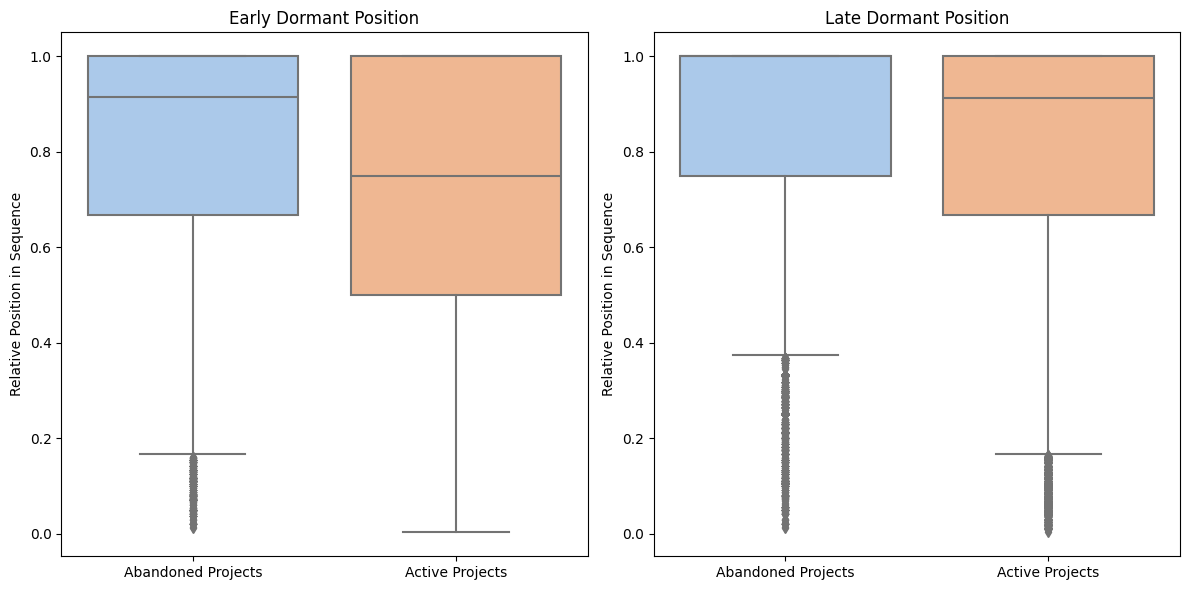

In [113]:
import pandas as pd
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate early and late Dormant positions
def calculate_dormant_positions(labeled_df):
    grouped = labeled_df.groupby('artifact_id')
    early_positions = []  # Relative position of first Dormant state
    late_positions = []   # Relative position of last Dormant state

    for artifact_id, group in grouped:
        group = group.sort_values('release_timestamp')  # Ensure chronological order
        sequence = group['label'].tolist()
        total_releases = len(sequence)

        # Find position of first and last Dormant state relative to total sequence length
        if 'Dormant' in sequence:
            first_dormant = sequence.index('Dormant') + 1  # 1-based index
            last_dormant = len(sequence) - sequence[::-1].index('Dormant')  # Last occurrence index

            early_positions.append(first_dormant / total_releases)  # Normalize to sequence length
            late_positions.append(last_dormant / total_releases)   # Normalize to sequence length
        else:
            # If no Dormant state, append None
            early_positions.append(None)
            late_positions.append(None)

    return pd.DataFrame({
        'artifact_id': grouped.groups.keys(),
        'Early Dormant Position': early_positions,
        'Late Dormant Position': late_positions
    })

# Step 1: Split the dataset into abandoned and active projects
abandoned_df = labeled_df[labeled_df['is_abandoned'] == 1]
active_df = labeled_df[labeled_df['is_abandoned'] == 0]

# Step 2: Calculate early and late Dormant positions for both groups
abandoned_dormant_positions = calculate_dormant_positions(abandoned_df)
active_dormant_positions = calculate_dormant_positions(active_df)

# Step 3: Drop None values (projects without Dormant states) for comparison
abandoned_early = abandoned_dormant_positions.dropna(subset=['Early Dormant Position'])['Early Dormant Position']
active_early = active_dormant_positions.dropna(subset=['Early Dormant Position'])['Early Dormant Position']

abandoned_late = abandoned_dormant_positions.dropna(subset=['Late Dormant Position'])['Late Dormant Position']
active_late = active_dormant_positions.dropna(subset=['Late Dormant Position'])['Late Dormant Position']

# Step 4: Perform statistical tests
# Mann-Whitney U Test for Early Dormant Position
u_stat_early, p_value_early = mannwhitneyu(abandoned_early, active_early)
print(f"Mann-Whitney U Test for Early Dormant Position:\nU = {u_stat_early:.2f}, p-value = {p_value_early:.4f}")

# Mann-Whitney U Test for Late Dormant Position
u_stat_late, p_value_late = mannwhitneyu(abandoned_late, active_late)
print(f"Mann-Whitney U Test for Late Dormant Position:\nU = {u_stat_late:.2f}, p-value = {p_value_late:.4f}")

# Step 5: Visualize the results
plt.figure(figsize=(12, 6))

# Boxplot for Early Dormant Position
plt.subplot(1, 2, 1)
sns.boxplot(data=[abandoned_early, active_early], palette="pastel")
plt.xticks([0, 1], ["Abandoned Projects", "Active Projects"])
plt.title("Early Dormant Position")
plt.ylabel("Relative Position in Sequence")

# Boxplot for Late Dormant Position
plt.subplot(1, 2, 2)
sns.boxplot(data=[abandoned_late, active_late], palette="pastel")
plt.xticks([0, 1], ["Abandoned Projects", "Active Projects"])
plt.title("Late Dormant Position")
plt.ylabel("Relative Position in Sequence")

plt.tight_layout()
plt.show()


In [120]:
# Calculate medians for late Dormant positions
median_abandoned_late = abandoned_late.median()
median_active_late = active_late.median()

print(f"Median Late Dormant Position - Abandoned Projects: {median_abandoned_late:.2f}")
print(f"Median Late Dormant Position - Active Projects: {median_active_late:.2f}")


Median Late Dormant Position - Abandoned Projects: 1.00
Median Late Dormant Position - Active Projects: 0.91


In [121]:
# Group by project (artifact_id) to analyze each project individually
def verify_late_dormant_by_projects(labeled_df, group_type="abandoned"):
    # Filter abandoned or active projects based on group_type
    if group_type == "abandoned":
        filtered_df = labeled_df[labeled_df['is_abandoned'] == 1]
    else:
        filtered_df = labeled_df[labeled_df['is_abandoned'] == 0]
    
    grouped = filtered_df.groupby('artifact_id')
    total_projects = grouped.ngroups

    # Counter to count how many projects have their last Dormant phase at the end
    projects_with_terminal_dormant = 0

    for artifact_id, group in grouped:
        # Sort by release_timestamp to ensure chronological order
        group = group.sort_values('release_timestamp')
        sequence = group['label'].tolist()

        # Check if the last Dormant phase is at the end of the lifecycle
        if 'Dormant' in sequence and sequence[-1] == 'Dormant':
            projects_with_terminal_dormant += 1

    # Calculate the proportion of projects with terminal Dormant phases
    ratio_terminal_dormant = projects_with_terminal_dormant / total_projects

    print(f"Total Projects ({group_type.capitalize()}): {total_projects}")
    print(f"Projects with Terminal Dormant Phase ({group_type.capitalize()}): {projects_with_terminal_dormant}")
    print(f"Proportion of Terminal Dormant Phase Projects ({group_type.capitalize()}): {ratio_terminal_dormant:.2%}")

# Verify for both abandoned and active projects
print("Verifying Late Dormant Position by Projects:")
verify_late_dormant_by_projects(labeled_df, group_type="abandoned")
verify_late_dormant_by_projects(labeled_df, group_type="active")


Verifying Late Dormant Position by Projects:
Total Projects (Abandoned): 206768
Projects with Terminal Dormant Phase (Abandoned): 20015
Proportion of Terminal Dormant Phase Projects (Abandoned): 9.68%
Total Projects (Active): 196280
Projects with Terminal Dormant Phase (Active): 19470
Proportion of Terminal Dormant Phase Projects (Active): 9.92%


In [114]:
# Function to compute Cliff's Delta
def cliffs_delta(x, y):
    """
    Compute Cliff's Delta, a measure of effect size.
    :param x: First sample (e.g., abandoned project positions)
    :param y: Second sample (e.g., active project positions)
    :return: Delta value
    """
    from itertools import product
    more = sum(1 for i, j in product(x, y) if i > j)
    less = sum(1 for i, j in product(x, y) if i < j)
    n = len(x)
    m = len(y)
    return (more - less) / (n * m)

# Calculate Cliff's Delta for Early Dormant Position
delta_early = cliffs_delta(abandoned_early, active_early)
print(f"Cliff's Delta for Early Dormant Position: {delta_early:.4f}")

# Calculate Cliff's Delta for Late Dormant Position
delta_late = cliffs_delta(abandoned_late, active_late)
print(f"Cliff's Delta for Late Dormant Position: {delta_late:.4f}")


Cliff's Delta for Early Dormant Position: 0.2283
Cliff's Delta for Late Dormant Position: 0.1653


In [170]:
import pandas as pd

# Function to capture the full sequence of labels with durations and is_abandoned status for each project
def capture_label_sequence_with_abandoned(df):
    # Sort data by artifact_id and release_timestamp for each project
    df = df.sort_values(by=['artifact_id', 'release_timestamp'])
    df['release_timestamp'] = pd.to_datetime(df['release_timestamp'])
    
    # Initialize a list to store the full sequence data
    sequence_data = []
    
    # Iterate over each project (grouped by artifact_id)
    for artifact_id, group in df.groupby('artifact_id'):
        project_sequence = []
        is_abandoned = group['is_abandoned'].iloc[0]  # Get the is_abandoned value for the project
        
        # Iterate over each release for the project
        for _, row in group.iterrows():
            # Capture the label and its associated time duration
            current_state = {
                'label': row['label'],
                'duration': row['interval']  # Assuming 'interval' contains the time duration
            }
            
            # Append the current state to the sequence
            project_sequence.append(current_state)
        
        # Append the entire sequence and is_abandoned status for the current project to the results
        sequence_data.append({
            'artifact_id': artifact_id,
            'is_abandoned': is_abandoned,
            'label_sequence': project_sequence
        })
    
    # Convert the results into a DataFrame
    return pd.DataFrame(sequence_data)

# Apply the function to capture the label sequence for each project in the dataset
full_sequence_df = capture_label_sequence_with_abandoned(labeled_df)

# Display the first few rows of the result
full_sequence_df

,artifact_id,is_abandoned,label_sequence
0,academy.compose.companion:multi-fab,1,"[{'label': 'Start', 'duration': nan}, {'label': 'Active', 'duration': 1.9880092592592593}, {'label': 'Active', 'duration': 6.4139236111111115}]"
1,ae.teletronics.ejabberd:EjabberdXMLRPCClient,1,"[{'label': 'Start', 'duration': nan}, {'label': 'Active', 'duration': 136.15369212962963}, {'label': 'Active', 'duration': 1.0127546296296297}, {'label': 'Active', 'duration': 0.993287037037037}]"
2,ae.teletronics.nlp:categorisation,1,"[{'label': 'Start', 'duration': nan}, {'label': 'Active', 'duration': 7.415763888888889}, {'label': 'Active', 'duration': 164.16881944444444}, {'label': 'Active', 'duration': 11.068622685185185}, {'label': 'Active', 'duration': 20.067870370370372}, {'label': 'Active', 'duration': 65.79157407407408}]"
3,ae.teletronics.nlp:entityextraction,1,"[{'label': 'Start', 'duration': nan}, {'label': 'Active', 'duration': 2.1225578703703705}, {'label': 'Active', 'duration': 2.9161342592592594}, {'label': 'Active', 'duration': 77.11314814814814}, {'label': 'Active', 'duration': 25.100127314814817}]"
4,ae.teletronics.nlp:language-detector,1,"[{'label': 'Start', 'duration': nan}, {'label': 'Active', 'duration': 6.008587962962963}, {'label': 'Active', 'duration': 15.876643518518518}, {'label': 'Active', 'duration': 0.07826388888888888}, {'label': 'Active', 'duration': 46.807048611111114}, {'label': 'Active', 'duration': 1.0534027777777777}]"
...,...,...,...
403043,zone.src.sheaf:sheaf-parent,0,"[{'label': 'Start', 'duration': nan}, {'label': 'Active', 'duration': 55.88615740740741}, {'label': 'Active', 'duration': 21.18670138888889}, {'label': 'Active', 'duration': 303.0025462962963}, {'label': 'Active', 'duration': 0.02732638888888889}, {'label': 'Active', 'duration': 40.23430555555556}, {'label': 'Active', 'duration': 30.479305555555555}, {'label': 'Active', 'duration': 35.08226851851852}, {'label': 'Active', 'duration': 119.04359953703704}, {'label': 'Active', 'duration': 7.272754629629629}, {'label': 'Active', 'duration': 131.99092592592592}, {'label': 'Active', 'duration': 34.83752314814815}, {'label': 'Active', 'duration': 46.949328703703706}, {'label': 'Active', 'duration': 8.042025462962963}, {'label': 'Active', 'duration': 219.94391203703702}, {'label': 'Active', 'duration': 0.024479166666666666}, {'label': 'Active', 'duration': 0.04356481481481481}, {'label': 'Dormant', 'duration': 1052.4298611111112}, {'label': 'Dormant', 'duration': 664.7428587962963}, {'label': 'Active', 'duration': 360.73354166666667}]"
403044,zone.src.sheaf:web-sheaf,0,"[{'label': 'Start', 'duration': nan}, {'label': 'Dormant', 'duration': 379.9321180555556}, {'label': 'Active', 'duration': 70.71730324074075}, {'label': 'Active', 'duration': 14.135011574074074}, {'label': 'Active', 'duration': 0.030127314814814815}, {'label': 'Active', 'duration': 20.910138888888888}, {'label': 'Active', 'duration': 61.17584490740741}, {'label': 'Active', 'duration': 57.878796296296294}, {'label': 'Active', 'duration': 7.269016203703703}, {'label': 'Active', 'duration': 76.78738425925926}, {'label': 'Active', 'duration': 15.062951388888889}, {'label': 'Active', 'duration': 11.381967592592593}, {'label': 'Active', 'duration': 5.56625}, {'label': 'Active', 'duration': 2.2344328703703704}, {'label': 'Active', 'duration': 20.96289351851852}, {'label': 'Active', 'duration': 6.0859606481481485}, {'label': 'Active', 'duration': 85.62092592592593}, {'label': 'Active', 'duration': 13.930868055555555}, {'label': 'Active', 'duration': 205.36649305555557}, {'label': 'Dormant', 'duration': 1051.2871412037036}, {'label': 'Dormant', 'duration': 664.7574189814815}, {'label': 'Active', 'duration': 22.763472222222223}, {'label': 'Active', 'duration': 338.0337037037037}]"
403045,zone.stefan.dev:geocode,1,"[{'label': 'Start', 'duration': nan}, {'label': 'Active', 'duration': 0.09314814814814815}]"
403046,zone.wmj:user-agent-util,1,"[{'label': 'Start', 'duration': nan}, {'label': 'Active', 'durat

In [78]:
full_sequence_df.head()

,artifact_id,is_abandoned,label_sequence
0,academy.compose.companion:multi-fab,1,"[{'label': 'Start', 'duration': nan}, {'label': 'Active', 'duration': 1.9880092592592593}, {'label': 'Active', 'duration': 6.4139236111111115}]"
1,ae.teletronics.ejabberd:EjabberdXMLRPCClient,1,"[{'label': 'Start', 'duration': nan}, {'label': 'Active', 'duration': 136.15369212962963}, {'label': 'Active', 'duration': 1.0127546296296297}, {'label': 'Active', 'duration': 0.993287037037037}]"
2,ae.teletronics.nlp:categorisation,1,"[{'label': 'Start', 'duration': nan}, {'label': 'Active', 'duration': 7.415763888888889}, {'label': 'Active', 'duration': 164.16881944444444}, {'label': 'Active', 'duration': 11.068622685185185}, {'label': 'Active', 'duration': 20.067870370370372}, {'label': 'Active', 'duration': 65.79157407407408}]"
3,ae.teletronics.nlp:entityextraction,1,"[{'label': 'Start', 'duration': nan}, {'label': 'Active', 'duration': 2.1225578703703705}, {'label': 'Active', 'duration': 2.9161342592592594}, {'label': 'Active', 'duration': 77.11314814814814}, {'label': 'Active', 'duration': 25.100127314814817}]"
4,ae.teletronics.nlp:language-detector,1,"[{'label': 'Start', 'duration': nan}, {'label': 'Active', 'duration': 6.008587962962963}, {'label': 'Active', 'duration': 15.876643518518518}, {'label': 'Active', 'duration': 0.07826388888888888}, {'label': 'Active', 'duration': 46.807048611111114}, {'label': 'Active', 'duration': 1.0534027777777777}]"


In [171]:
from collections import Counter
import pandas as pd

def calculate_transitions(full_sequence_df):
    # Separate the data into abandoned and active based on 'is_abandoned'
    abandoned_df = full_sequence_df[full_sequence_df['is_abandoned'] == 1]
    active_df = full_sequence_df[full_sequence_df['is_abandoned'] == 0]

    # Function to calculate transitions for a given DataFrame
    def compute_transitions(data):
        transitions = []

        for _, row in data.iterrows():
            sequence = row['label_sequence']
            
            # Capture consecutive transitions within the sequence
            for i in range(1, len(sequence)):
                from_state = sequence[i - 1]['label']
                to_state = sequence[i]['label']
                
                # Append each transition as a tuple
                transitions.append((from_state, to_state))

        # Step 2: Count the occurrences of each transition
        transition_counts = Counter(transitions)

        # Step 3: Calculate total transitions from each state
        total_transitions_from_state = Counter([from_state for from_state, _ in transitions])

        # Step 4: Calculate transition probabilities
        transition_probabilities = {}

        for (from_state, to_state), count in transition_counts.items():
            # Calculate the probability of transition from 'from_state' to 'to_state'
            probability = (count / total_transitions_from_state[from_state]) * 100  # Convert to percentage
            transition_probabilities[(from_state, to_state)] = round(probability, 2)

        # Step 5: Convert the results into a DataFrame for easy viewing
        transition_df = pd.DataFrame(
            [(from_state, to_state, prob) for (from_state, to_state), prob in transition_probabilities.items()],
            columns=['From State', 'To State', 'Transition Probability (%)']
        )

        # Sort for better readability
        transition_df.sort_values(by=['From State', 'To State'], inplace=True)
        transition_df.reset_index(drop=True, inplace=True)

        return transition_df

    # Calculate transitions for abandoned and active projects
    abandoned_transitions = compute_transitions(abandoned_df)
    active_transitions = compute_transitions(active_df)

    return abandoned_transitions, active_transitions

# Apply the function to your full_sequence_df
abandoned_transitions_df, active_transitions_df = calculate_transitions(full_sequence_df)

# Display the results
print("Abandoned Project Transitions:")
print(abandoned_transitions_df)

print("\nActive Project Transitions:")
print(active_transitions_df)


Abandoned Project Transitions:
  From State To State  Transition Probability (%)
0     Active   Active                       98.89
1     Active  Dormant                        1.11
2    Dormant   Active                       81.16
3    Dormant  Dormant                       18.84
4      Start   Active                       94.57
5      Start  Dormant                        5.43

Active Project Transitions:
  From State To State  Transition Probability (%)
0     Active   Active                       99.51
1     Active  Dormant                        0.49
2    Dormant   Active                       81.63
3    Dormant  Dormant                       18.37
4      Start   Active                       94.79
5      Start  Dormant                        5.21


In [174]:
from collections import Counter
import pandas as pd

def calculate_transitions_with_durations_from_labeled_df(labeled_df):
    # Ensure 'release_timestamp' is in datetime format
    labeled_df['release_timestamp'] = pd.to_datetime(labeled_df['release_timestamp'])

    # Step 1: Create sequences grouped by artifact_id
    grouped = labeled_df.sort_values(by=['artifact_id', 'release_timestamp']).groupby('artifact_id')

    # Build a sequence list
    full_sequence = []
    for artifact_id, group in grouped:
        label_sequence = group[['label', 'release_timestamp']].to_dict(orient='records')
        full_sequence.append({'artifact_id': artifact_id, 'label_sequence': label_sequence})

    full_sequence_df = pd.DataFrame(full_sequence)

    # Function to calculate transitions for a given DataFrame
    def compute_transitions(data):
        transitions = []
        durations = []

        for _, row in data.iterrows():
            sequence = row['label_sequence']
            
            # Capture consecutive transitions within the sequence
            for i in range(1, len(sequence)):
                from_state = sequence[i - 1]['label']
                to_state = sequence[i]['label']
                
                # Calculate time duration between transitions
                from_time = sequence[i - 1]['release_timestamp']
                to_time = sequence[i]['release_timestamp']
                time_duration = (to_time - from_time).total_seconds() / 86400  # Convert seconds to hours
                
                # Append each transition and its duration
                transitions.append((from_state, to_state))
                durations.append(time_duration)

        # Step 2: Count the occurrences of each transition
        transition_counts = Counter(transitions)

        # Step 3: Calculate total transitions from each state
        total_transitions_from_state = Counter([from_state for from_state, _ in transitions])

        # Step 4: Calculate transition probabilities and average durations
        transition_details = {}

        for (from_state, to_state), count in transition_counts.items():
            # Calculate the probability of transition from 'from_state' to 'to_state'
            probability = (count / total_transitions_from_state[from_state]) * 100  # Convert to percentage
            
            # Collect durations for this transition
            transition_durations = [dur for trans, dur in zip(transitions, durations) if trans == (from_state, to_state)]
            avg_duration = sum(transition_durations) / len(transition_durations) if transition_durations else 0
            
            transition_details[(from_state, to_state)] = (round(probability, 2), round(avg_duration, 2))

        # Step 5: Convert the results into a DataFrame for easy viewing
        transition_df = pd.DataFrame(
            [(from_state, to_state, prob, avg_duration) 
             for (from_state, to_state), (prob, avg_duration) in transition_details.items()],
            columns=['From State', 'To State', 'Transition Probability (%)', 'Average Duration (days)']
        )

        # Sort for better readability
        transition_df.sort_values(by=['From State', 'To State'], inplace=True)
        transition_df.reset_index(drop=True, inplace=True)

        return transition_df

    # Separate sequences into abandoned and active based on `is_abandoned`
    abandoned_df = full_sequence_df[full_sequence_df['artifact_id'].isin(labeled_df[labeled_df['is_abandoned'] == 1]['artifact_id'].unique())]
    active_df = full_sequence_df[full_sequence_df['artifact_id'].isin(labeled_df[labeled_df['is_abandoned'] == 0]['artifact_id'].unique())]

    # Calculate transitions for abandoned and active projects
    abandoned_transitions = compute_transitions(abandoned_df)
    active_transitions = compute_transitions(active_df)

    return abandoned_transitions, active_transitions

# Apply the function to your labeled_df
abandoned_transitions_df, active_transitions_df = calculate_transitions_with_durations_from_labeled_df(labeled_df)

# Display the results
print("Abandoned Project Transitions with Durations:")
print(abandoned_transitions_df)

print("\nActive Project Transitions with Durations:")
print(active_transitions_df)


Abandoned Project Transitions with Durations:
  From State To State  Transition Probability (%)  Average Duration (days)
0     Active   Active                       98.89                    24.45
1     Active  Dormant                        1.11                   620.56
2    Dormant   Active                       81.16                    86.14
3    Dormant  Dormant                       18.84                   668.44
4      Start   Active                       94.57                    44.58
5      Start  Dormant                        5.43                   726.31

Active Project Transitions with Durations:
  From State To State  Transition Probability (%)  Average Duration (days)
0     Active   Active                       99.51                    17.60
1     Active  Dormant                        0.49                   624.19
2    Dormant   Active                       81.63                    91.67
3    Dormant  Dormant                       18.37                   739.01
4      Sta

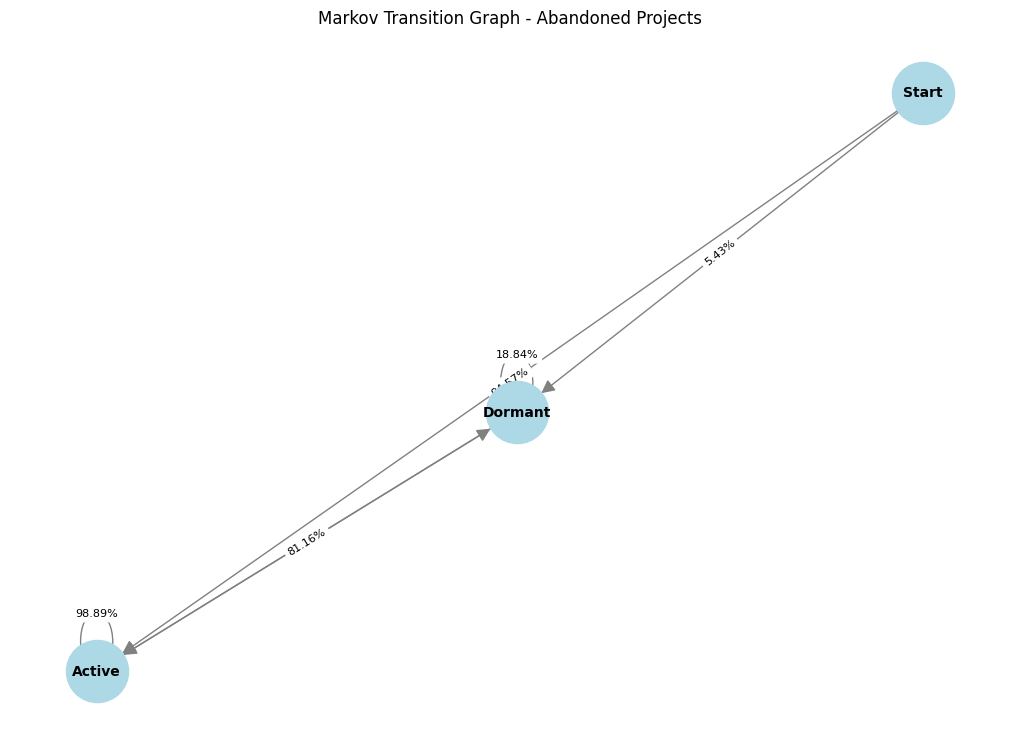

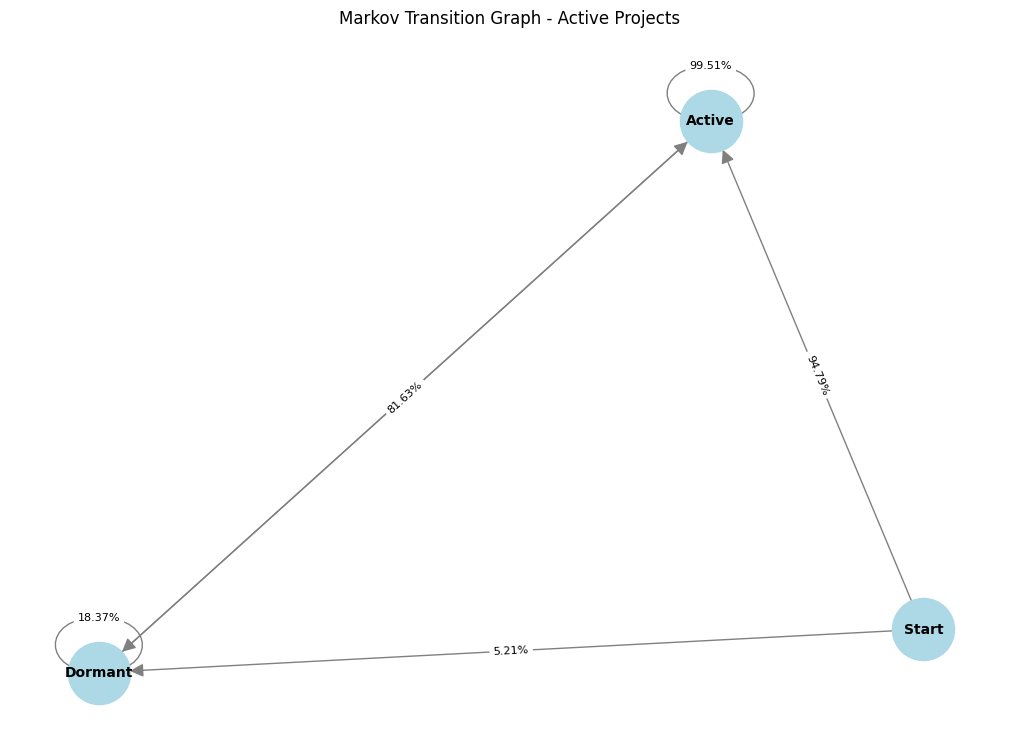

In [97]:
import networkx as nx
import matplotlib.pyplot as plt

def create_markov_graph(transition_df, title):
    # Create a directed graph
    G = nx.DiGraph()

    # Add edges with weights (transition probabilities)
    for _, row in transition_df.iterrows():
        G.add_edge(row['From State'], row['To State'], weight=row['Transition Probability (%)'])

    # Draw the graph
    pos = nx.spring_layout(G)  # You can change the layout if needed
    plt.figure(figsize=(10, 7))
    nx.draw(
        G, pos, with_labels=True, node_color="lightblue", 
        node_size=2000, font_size=10, font_weight="bold", 
        edge_color="gray", arrowsize=20
    )
    # Add edge labels for weights
    edge_labels = nx.get_edge_attributes(G, 'weight')
    formatted_edge_labels = {k: f"{v}%" for k, v in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_edge_labels, font_size=8)

    plt.title(title)
    plt.show()

# Create Markov transition graphs for abandoned and active projects
create_markov_graph(abandoned_transitions_df, "Markov Transition Graph - Abandoned Projects")
create_markov_graph(active_transitions_df, "Markov Transition Graph - Active Projects")


In [80]:
import pandas as pd
from collections import Counter

# Function to extract transitions from the full sequence
def extract_transitions(full_sequence_df):
    transitions = []
    for sequence in full_sequence_df['label_sequence']:
        for i in range(len(sequence) - 1):  # Pairwise transitions
            transitions.append((sequence[i]['label'], sequence[i+1]['label']))
    return transitions

# Function to calculate the transition matrix
def calculate_transition_matrix(full_sequence_df):
    # Step 1: Extract transitions
    transitions = extract_transitions(full_sequence_df)
    
    # Count occurrences of transitions
    transition_counts = Counter(transitions)
    
    # Get all unique states
    unique_states = list(set(state for transition in transition_counts.keys() for state in transition))
    
    # Step 2: Build Transition Matrix
    # Create an empty transition matrix
    transition_matrix = pd.DataFrame(0, index=unique_states, columns=unique_states, dtype=float)
    
    # Populate the matrix with transition counts
    for (from_state, to_state), count in transition_counts.items():
        transition_matrix.loc[from_state, to_state] += count
    
    # Normalize rows to calculate probabilities
    transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)
    
    return transition_matrix

# Split the dataset into abandoned and active
abandoned_df = full_sequence_df[full_sequence_df['is_abandoned'] == 1]
active_df = full_sequence_df[full_sequence_df['is_abandoned'] == 0]

# Calculate transition matrices for abandoned and active projects
abandoned_transition_matrix = calculate_transition_matrix(abandoned_df)
active_transition_matrix = calculate_transition_matrix(active_df)

# Display the results
print("Abandoned Projects - Transition Matrix:")
print(abandoned_transition_matrix)

print("\nActive Projects - Transition Matrix:")
print(active_transition_matrix)


Abandoned Projects - Transition Matrix:
         Dormant  Active  Start
Dormant     0.19    0.81   0.00
Active      0.01    0.99   0.00
Start       0.05    0.95   0.00

Active Projects - Transition Matrix:
         Dormant  Active  Start
Dormant     0.18    0.82   0.00
Active      0.00    1.00   0.00
Start       0.05    0.95   0.00


In [96]:
import itertools
import pandas as pd

# Function to compute multi-step probabilities for a given transition matrix
def compute_multi_step_probabilities(matrix, steps=3):
    states = list(matrix.index)  # Get all states
    paths = list(itertools.product(states, repeat=steps))  # All possible multi-step paths
    results = []
    
    for path in paths:
        prob = 1.0
        # Multiply probabilities for the given path
        for i in range(len(path) - 1):
            prob *= matrix.loc[path[i], path[i+1]]
        
        # Only include paths with non-zero probability
        if prob > 0:
            results.append({"Path": " → ".join(path), "Probability": prob})
    
    # Convert results to a DataFrame
    return pd.DataFrame(results).sort_values(by="Probability", ascending=False)

# Function to calculate transition matrix and multi-step probabilities for a dataset
def calculate_transition_matrices_and_probs(full_sequence_df, steps=3):
    # Function to extract transitions
    def extract_transitions(label_sequence):
        transitions = []
        for sequence in label_sequence:
            for i in range(len(sequence) - 1):  # Pairwise transitions
                transitions.append((sequence[i]['label'], sequence[i+1]['label']))
        return transitions

    # Function to calculate the transition matrix
    def calculate_transition_matrix(full_sequence_df):
        transitions = extract_transitions(full_sequence_df['label_sequence'])
        transition_counts = Counter(transitions)

        # Get all unique states
        unique_states = list(set(state for transition in transition_counts.keys() for state in transition))

        # Build Transition Matrix
        transition_matrix = pd.DataFrame(0, index=unique_states, columns=unique_states, dtype=float)

        # Populate matrix with counts
        for (from_state, to_state), count in transition_counts.items():
            transition_matrix.loc[from_state, to_state] += count

        # Normalize rows to calculate probabilities
        transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)
        return transition_matrix

    # Split the dataset into abandoned and active
    abandoned_df = full_sequence_df[full_sequence_df['is_abandoned'] == 1]
    active_df = full_sequence_df[full_sequence_df['is_abandoned'] == 0]

    # Calculate transition matrices
    abandoned_transition_matrix = calculate_transition_matrix(abandoned_df)
    active_transition_matrix = calculate_transition_matrix(active_df)

    # Compute multi-step probabilities
    abandoned_multi_step_probs = compute_multi_step_probabilities(abandoned_transition_matrix, steps=steps)
    active_multi_step_probs = compute_multi_step_probabilities(active_transition_matrix, steps=steps)

    return abandoned_transition_matrix, active_transition_matrix, abandoned_multi_step_probs, active_multi_step_probs

# Apply the function to your dataset
steps = 3  # Number of steps for multi-step probabilities
abandoned_matrix, active_matrix, abandoned_probs, active_probs = calculate_transition_matrices_and_probs(full_sequence_df, steps=steps)

# Display the results
print("Abandoned Projects - Transition Matrix:")
print(abandoned_matrix)

print("\nAbandoned Projects - Multi-Step Probabilities:")
print(abandoned_probs)

print("\nActive Projects - Transition Matrix:")
print(active_matrix)

print("\nActive Projects - Multi-Step Probabilities:")
print(active_probs)


Abandoned Projects - Transition Matrix:
         Dormant  Active  Start
Dormant     0.19    0.81   0.00
Active      0.01    0.99   0.00
Start       0.05    0.95   0.00

Abandoned Projects - Multi-Step Probabilities:
                           Path  Probability
7      Active → Active → Active         0.98
11      Start → Active → Active         0.94
3     Dormant → Active → Active         0.80
1    Dormant → Dormant → Active         0.15
9      Start → Dormant → Active         0.04
0   Dormant → Dormant → Dormant         0.04
6     Active → Active → Dormant         0.01
10     Start → Active → Dormant         0.01
8     Start → Dormant → Dormant         0.01
2    Dormant → Active → Dormant         0.01
5     Active → Dormant → Active         0.01
4    Active → Dormant → Dormant         0.00

Active Projects - Transition Matrix:
         Dormant  Active  Start
Dormant     0.18    0.82   0.00
Active      0.00    1.00   0.00
Start       0.05    0.95   0.00

Active Projects - Multi-Step Pro

In [55]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Function to generate pairwise transitions for FP-Growth
def generate_fp_growth_transactions(full_sequence_df):
    """
    Generate pairwise transitions, treating each label transition independently.
    """
    transactions_abandoned = []
    transactions_active = []

    for _, row in full_sequence_df.iterrows():
        label_sequence = [state['label'] for state in row['label_sequence']]
        # Generate all possible transitions (each pair is treated separately)
        transitions = [(label_sequence[i], label_sequence[i + 1]) for i in range(len(label_sequence) - 1)]
        if row['is_abandoned'] == 1:
            transactions_abandoned.extend(transitions)
        else:
            transactions_active.extend(transitions)

    return transactions_abandoned, transactions_active

# Step 1: Generate transactions
transactions_abandoned, transactions_active = generate_fp_growth_transactions(full_sequence_df)

# Step 2: Prepare data for FP-Growth
def prepare_fp_data(transactions):
    """
    Prepare one-hot encoded data for FP-Growth.
    """
    te = TransactionEncoder()
    te_data = te.fit(transactions).transform(transactions)
    return pd.DataFrame(te_data, columns=te.columns_)

df_abandoned = prepare_fp_data(transactions_abandoned)
df_active = prepare_fp_data(transactions_active)

# Step 3: Apply FP-Growth
def mine_frequent_patterns(df, min_support=0.001):
    """
    Mine frequent patterns using FP-Growth.
    """
    return fpgrowth(df, min_support=min_support, use_colnames=True)

frequent_patterns_abandoned = mine_frequent_patterns(df_abandoned)
frequent_patterns_active = mine_frequent_patterns(df_active)

# Step 4: Generate association rules
def generate_association_rules(frequent_patterns, metric="support", min_threshold=0.001):
    """
    Generate association rules from frequent patterns.
    """
    return association_rules(frequent_patterns, metric=metric, min_threshold=min_threshold)

rules_abandoned = generate_association_rules(frequent_patterns_abandoned, metric="support", min_threshold=0.001)
rules_active = generate_association_rules(frequent_patterns_active, metric="support", min_threshold=0.001)




Frequent Patterns for Abandoned Projects:
   support           itemsets
0     0.99           (Active)
1     0.08            (Start)
2     0.02          (Dormant)
3     0.07    (Active, Start)
4     0.00   (Start, Dormant)
5     0.02  (Active, Dormant)

Association Rules for Abandoned Projects:
  antecedents consequents  antecedent support  consequent support  support  \
0    (Active)     (Start)                0.99                0.08     0.07   
1     (Start)    (Active)                0.08                0.99     0.07   
2     (Start)   (Dormant)                0.08                0.02     0.00   
3   (Dormant)     (Start)                0.02                0.08     0.00   
4    (Active)   (Dormant)                0.99                0.02     0.02   
5   (Dormant)    (Active)                0.02                0.99     0.02   

   confidence  lift  leverage  conviction  zhangs_metric  
0        0.07  0.95     -0.00        1.00          -0.90  
1        0.95  0.95     -0.00        0.1

In [104]:
rules_abandoned

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Active),(Start),0.99,0.08,0.07,0.07,0.95,-0.00,1.00,-0.90
1,(Start),(Active),0.08,0.99,0.07,0.95,0.95,-0.00,0.11,-0.05
2,(Start),(Dormant),0.08,0.02,0.00,0.05,2.38,0.00,1.03,0.63
3,(Dormant),(Start),0.02,0.08,0.00,0.18,2.38,0.00,1.13,0.59
4,(Active),(Dormant),0.99,0.02,0.02,0.02,0.75,-0.01,0.99,-0.98
5,(Dormant),(Active),0.02,0.99,0.02,0.75,0.75,-0.01,0.02,-0.25


In [105]:
rules_active

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Active),(Start),1.00,0.02,0.02,0.02,0.95,-0.00,1.00,-0.97
1,(Start),(Active),0.02,1.00,0.02,0.95,0.95,-0.00,0.04,-0.05
2,(Active),(Dormant),1.00,0.01,0.01,0.01,0.82,-0.00,1.00,-0.99
3,(Dormant),(Active),0.01,1.00,0.01,0.82,0.82,-0.00,0.01,-0.18
4,(Start),(Dormant),0.02,0.01,0.00,0.05,4.91,0.00,1.04,0.81
5,(Dormant),(Start),0.01,0.02,0.00,0.10,4.91,0.00,1.08,0.80


In [106]:
# def filter_invalid_start_rules(rules):
#     return rules[~rules['consequents'].apply(lambda x: 'Start' in x and 'Start' not in x)]

def filter_invalid_start_rules(rules):
    """
    Filters out rules where 'Start' appears in the consequents
    but not as the sole antecedent.
    """
    return rules[~rules.apply(
        lambda row: 'Start' in row['consequents'] and 'Start' not in row['antecedents'],
        axis=1
    )]

# Apply the filter to association rules
rules_abandoned_filtered = filter_invalid_start_rules(rules_abandoned)
rules_active_filtered = filter_invalid_start_rules(rules_active)
rules_abandoned_filtered

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Start),(Active),0.08,0.99,0.07,0.95,0.95,-0.00,0.11,-0.05
2,(Start),(Dormant),0.08,0.02,0.00,0.05,2.38,0.00,1.03,0.63
4,(Active),(Dormant),0.99,0.02,0.02,0.02,0.75,-0.01,0.99,-0.98
5,(Dormant),(Active),0.02,0.99,0.02,0.75,0.75,-0.01,0.02,-0.25


In [107]:
rules_active_filtered

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Start),(Active),0.02,1.00,0.02,0.95,0.95,-0.00,0.04,-0.05
2,(Active),(Dormant),1.00,0.01,0.01,0.01,0.82,-0.00,1.00,-0.99
3,(Dormant),(Active),0.01,1.00,0.01,0.82,0.82,-0.00,0.01,-0.18
4,(Start),(Dormant),0.02,0.01,0.00,0.05,4.91,0.00,1.04,0.81


In [ ]:
# from mlxtend.frequent_patterns import fpgrowth, association_rules
# from mlxtend.preprocessing import TransactionEncoder

# # Function to generate variable-length sliding windows
# def generate_variable_windows(full_sequence_df, max_window_size=5):
#     """
#     Generate sliding windows of variable sizes (up to max_window_size) from label sequences.
#     """
#     transactions = []
#     for _, row in full_sequence_df.iterrows():
#         label_sequence = [state['label'] for state in row['label_sequence']]
#         # Generate all sliding windows for lengths from 2 to max_window_size
#         for window_size in range(2, max_window_size + 1):
#             for i in range(len(label_sequence) - window_size + 1):
#                 transactions.append(tuple(label_sequence[i:i + window_size]))
#     return transactions

# # Step 1: Generate transactions for variable-length windows
# max_window_size = 5  # Define the maximum length of sequences to capture
# transactions_abandoned = generate_variable_windows(
#     full_sequence_df[full_sequence_df['is_abandoned'] == 1], max_window_size=max_window_size
# )
# transactions_active = generate_variable_windows(
#     full_sequence_df[full_sequence_df['is_abandoned'] == 0], max_window_size=max_window_size
# )

# # Step 2: Prepare data for FP-Growth
# def prepare_fp_data(transactions):
#     te = TransactionEncoder()
#     te_data = te.fit(transactions).transform(transactions)
#     return pd.DataFrame(te_data, columns=te.columns_)

# df_abandoned = prepare_fp_data(transactions_abandoned)
# df_active = prepare_fp_data(transactions_active)

# # Step 3: Apply FP-Growth
# frequent_patterns_abandoned = fpgrowth(df_abandoned, min_support=0.01, use_colnames=True)
# frequent_patterns_active = fpgrowth(df_active, min_support=0.01, use_colnames=True)

# # Step 4: Generate All Association Rules
# rules_abandoned = association_rules(frequent_patterns_abandoned, metric="confidence", min_threshold=0.001)
# rules_active = association_rules(frequent_patterns_active, metric="confidence", min_threshold=0.001)

# # Display all rules
# print("All Rules for Abandoned Projects (Variable-Length Sequences):")
# print(rules_abandoned)

# print("\nAll Rules for Active Projects (Variable-Length Sequences):")
# print(rules_active)


All Rules for Abandoned Projects (Variable-Length Sequences):
  antecedents consequents  antecedent support  consequent support  support  \
0    (Active)     (Start)                1.00                0.06     0.06   
1     (Start)    (Active)                0.06                1.00     0.06   
2    (Active)   (Dormant)                1.00                0.02     0.02   
3   (Dormant)    (Active)                0.02                1.00     0.02   

   confidence  lift  leverage  conviction  zhangs_metric  
0        0.06  0.98     -0.00        1.00          -0.91  
1        0.98  0.98     -0.00        0.09          -0.02  
2        0.02  0.93     -0.00        1.00          -0.98  
3        0.92  0.93     -0.00        0.02          -0.08  

All Rules for Active Projects (Variable-Length Sequences):
  antecedents consequents  antecedent support  consequent support  support  \
0    (Active)     (Start)                1.00                0.02     0.02   
1     (Start)    (Active)           

In [176]:
import pandas as pd
import numpy as np


# Calculate project start and end timestamps
labeled_df['project_start'] = labeled_df.groupby('artifact_id')['release_timestamp'].transform('min')
labeled_df['project_end'] = labeled_df.groupby('artifact_id')['release_timestamp'].transform('max')

# Identify distinct dormant phases
labeled_df['dormant_phase'] = (labeled_df['label'] == 'Dormant').astype(int)
labeled_df['dormant_phase_group'] = labeled_df.groupby('artifact_id')['dormant_phase'].diff().ne(0).cumsum() * labeled_df['dormant_phase']

# Summarize dormant phase metrics for each project
def calculate_project_metrics(group):
    # Number of dormant phases
    num_dormant_phases = group['dormant_phase_group'].nunique() if group['dormant_phase'].sum() > 0 else 0
    
    # First and last dormant phase positions
    dormant_timestamps = group.loc[group['label'] == 'Dormant', 'release_timestamp']
    if not dormant_timestamps.empty:
        first_dormant_pos = (dormant_timestamps.min() - group['project_start'].iloc[0]).days / \
                            (group['project_end'].iloc[0] - group['project_start'].iloc[0]).days
        last_dormant_pos = (dormant_timestamps.max() - group['project_start'].iloc[0]).days / \
                           (group['project_end'].iloc[0] - group['project_start'].iloc[0]).days
    else:
        first_dormant_pos, last_dormant_pos = np.nan, np.nan
    
    # Proportion of dormant releases
    prop_dormant_releases = group['dormant_phase'].sum() / len(group)
    
    return pd.Series({
        'num_dormant_phases': num_dormant_phases,
        'first_dormant_pos': first_dormant_pos,
        'last_dormant_pos': last_dormant_pos,
        'prop_dormant_releases': prop_dormant_releases
    })

# Apply to each project
project_metrics = labeled_df.groupby('artifact_id').apply(calculate_project_metrics).reset_index()
project_metrics

/var/folders/49/199vrwcn1zqb7rx4rgy0xhbr0000gn/T/ipykernel_86109/3322130299.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  project_metrics = labeled_df.groupby('artifact_id').apply(calculate_project_metrics).reset_index()


,artifact_id,num_dormant_phases,first_dormant_pos,last_dormant_pos,prop_dormant_releases
0,academy.compose.companion:multi-fab,0.00,NaN,NaN,0.00
1,ae.teletronics.ejabberd:EjabberdXMLRPCClient,0.00,NaN,NaN,0.00
2,ae.teletronics.nlp:categorisation,0.00,NaN,NaN,0.00
3,ae.teletronics.nlp:entityextraction,0.00,NaN,NaN,0.00
4,ae.teletronics.nlp:language-detector,0.00,NaN,NaN,0.00
...,...,...,...,...,...
403043,zone.src.sheaf:sheaf-parent,2.00,0.67,0.89,0.10
403044,zone.src.sheaf:web-sheaf,3.00,0.12,0.89,0.13
403045,zone.stefan.dev:geocode,0.00,NaN,NaN,0.00
403046,zone.wmj:user-agent-util,0.00,NaN,NaN,0.00


In [177]:
# Merge project metrics with labeled data to include `is_abandoned`
project_metrics = project_metrics.merge(labeled_df[['artifact_id', 'is_abandoned']], on='artifact_id', how='left')
project_metrics

,artifact_id,num_dormant_phases,first_dormant_pos,last_dormant_pos,prop_dormant_releases,is_abandoned
0,academy.compose.companion:multi-fab,0.00,NaN,NaN,0.00,1
1,academy.compose.companion:multi-fab,0.00,NaN,NaN,0.00,1
2,academy.compose.companion:multi-fab,0.00,NaN,NaN,0.00,1
3,ae.teletronics.ejabberd:EjabberdXMLRPCClient,0.00,NaN,NaN,0.00,1
4,ae.teletronics.ejabberd:EjabberdXMLRPCClient,0.00,NaN,NaN,0.00,1
...,...,...,...,...,...,...
13124324,zone.wmj:user-agent-util,0.00,NaN,NaN,0.00,1
13124325,zone.wmj:user-agent-util,0.00,NaN,NaN,0.00,1
13124326,zw.co.paynow:java-sdk,0.00,NaN,NaN,0.00,1
13124327,zw.co.paynow:java-sdk,0.00,NaN,NaN,0.00,1


In [180]:
from scipy.stats import mannwhitneyu
import pandas as pd

# Separate the two groups
abandoned = project_metrics[project_metrics['is_abandoned'] == 1]
active = project_metrics[project_metrics['is_abandoned'] == 0]

# Filter projects with at least one dormant phase
abandoned_with_dormant = abandoned.dropna(subset=['first_dormant_pos', 'last_dormant_pos'])
active_with_dormant = active.dropna(subset=['first_dormant_pos', 'last_dormant_pos'])

# Define metrics to test
metrics = {
    'num_dormant_phases': (abandoned, active),
    'first_dormant_pos': (abandoned_with_dormant, active_with_dormant),
    'last_dormant_pos': (abandoned_with_dormant, active_with_dormant),
    'prop_dormant_releases': (abandoned, active)
}

# Perform tests
results = {}
for metric, (group1, group2) in metrics.items():
    # Mann-Whitney U test for the metric
    test_stat, p_value = mannwhitneyu(group1[metric], group2[metric], alternative='two-sided')
    results[metric] = {'statistic': test_stat, 'p_value': p_value}

# Convert results to a DataFrame for display
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2250: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  dtyp = np.find_common_type([x.dtype, np.float64], [])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2250: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  dtyp = np.find_common_type([x.dtype, np.float64], [])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2250: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.re

,statistic,p_value
num_dormant_phases,15338685401099.00,0.00
first_dormant_pos,190398520138.00,0.00
last_dormant_pos,182746013661.00,0.00
prop_dormant_releases,15390579301387.50,0.00
